In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Exploratory Data Analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Missing values apparent from the above info. Check total numbers of missing data:

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### A lot of missing data for Cabin, display the percent of missing data

In [6]:
print("Cabin missing data: {:.0%}".format(df.isnull().sum()['Cabin'] / len(df['Cabin'])))

Cabin missing data: 77%


#### Will not use Name or Ticket in this analysis as the name and ticket is unique to each individual so drop those columns.
#### Also drop Cabin as there is a significant amount of missing data

In [7]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


#### Need to deal with the missing data for the Age column

In [9]:
# Average age across all training data
np.floor(df['Age'].mean())

29.0

In [10]:
# Fill in the NaN values with the average age
df['Age'] = df['Age'].fillna(np.floor(df['Age'].mean()))

In [11]:
# Check remaining missing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
# Check unique values for Embarked
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
# Look at the two rows containing missing Embarked data
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


#### Both individuals above paid a Fare of 80. Look at where others who paid a similar fare embarked from.

In [14]:
df[(df['Fare'] > 70) & (df['Fare'] > 90)]['Embarked'].value_counts()

C    31
S    26
Name: Embarked, dtype: int64

In [15]:
# Embarked from 'C' is slightly more common than from 'S', so fill in those NaN values with 'C' 
df['Embarked'] = df['Embarked'].fillna('C')

In [16]:
# Confirm no more missing data
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Explore if Fare category has any extreme outliers

In [17]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare'>

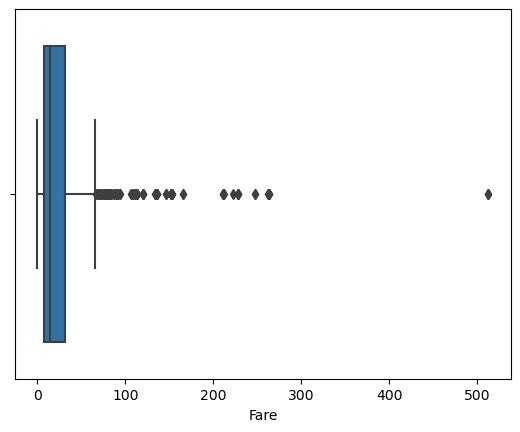

In [18]:
sns.boxplot(data=df, x='Fare')

In [19]:
df[df['Fare'] > 500]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
259,1,1,female,35.0,0,0,512.3292,C
680,1,1,male,36.0,0,1,512.3292,C
738,1,1,male,35.0,0,0,512.3292,C


#### Appears that the Fares over 500 are quite extreme outliers.
#### Remove those values from our data

In [20]:
df = df[df['Fare'] < 500]

<AxesSubplot:xlabel='Fare'>

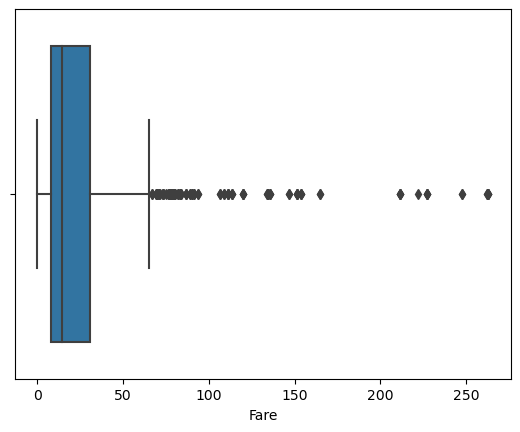

In [21]:
sns.boxplot(data=df, x='Fare')

#### Fare values above 200 are also quite extreme outliers. Remove as well

In [22]:
df = df[df['Fare'] < 200]

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,29.0,1,2,23.4500,S


#### Convert the Pclass category to the corresponding categories. Pclass is an indicator of socioeconomic status as follows:
    1 -> Upper
    2 -> Middle
    3 -> Lower

In [24]:
df['Pclass'] = df['Pclass'].map({1: 'upper', 2: 'middle', 3: 'lower'})

#### Get dummy variables for categorical features (Sex, Pclass, and Embarked)

In [25]:
df_dummy = pd.get_dummies(df, drop_first=True)

In [26]:
df_dummy

,Survived,Age,SibSp,Parch,Fare,Pclass_middle,Pclass_upper,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1
2,1,38.0,1,0,71.2833,0,1,0,0,0
3,1,26.0,0,0,7.9250,0,0,0,0,1
4,1,35.0,1,0,53.1000,0,1,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,1,0,1,0,1
888,1,19.0,0,0,30.0000,0,1,0,0,1
889,0,29.0,1,2,23.4500,0,0,0,0,1


#### Remaining features correlation values to the target column (Survived)

In [27]:
df_dummy.corr()['Survived']

Survived         1.000000
Age             -0.070001
SibSp           -0.040547
Parch            0.080408
Fare             0.298671
Pclass_middle    0.102802
Pclass_upper     0.273441
Sex_male        -0.534088
Embarked_Q       0.008376
Embarked_S      -0.146830
Name: Survived, dtype: float64

# Train test split

In [28]:
X = df_dummy.drop('Survived', axis=1)
y = df_dummy['Survived']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit_transform to training data, but not to test data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# SVM
Using an SVM for first attempt employing a grid search to find the best hyperparameters

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [33]:
# Set up parameter grid for GridSearch
param_grid = {'C': np.arange(0.1, 3.1, 0.1),
              'degree': np.arange(1, 6),
              'gamma': ['scale', 'auto'],
              'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1],
              'class_weight': [None, 'balanced']}

In [34]:
# Initialize svc instance and grid search
svc = SVC(random_state=101)

grid_svc = GridSearchCV(svc, param_grid)

In [35]:
# Fit the grid to the training data
grid_svc.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(random_state=101),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ]),
                         'class_weight': [None, 'balanced'],
                         'degree': array([1, 2, 3, 4, 5]),
                         'gamma': ['scale', 'auto'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1]})

# Performance Metrics

In [36]:
from sklearn.metrics import classification_report

In [37]:
svc_preds = grid_svc.predict(scaled_X_test)

In [38]:
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       172
           1       0.80      0.71      0.75        90

    accuracy                           0.84       262
   macro avg       0.83      0.81      0.82       262
weighted avg       0.84      0.84      0.84       262



84% overall accuracy on the test set. Could optimize using a larger parameter grid or attempt to use a randomized search
to improve this score. Could also attempt to extract more meaningful information from the Name and Cabin columns which
were dropped. For now, will submit test predictions.

#### Grab the best estimator found from the grid search and fit to the entire data set now

In [39]:
svc = grid_svc.best_estimator_

In [40]:
scaled_X = scaler.fit_transform(X)

In [41]:
svc.fit(scaled_X, y)

SVC(C=1.1, degree=1, random_state=101, tol=1)

# Test set

In [42]:
test_full = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')

In [43]:
test_full = test_full.drop(['Name', 'Ticket', 'Cabin'], axis=1)

#### Check for missing data (follow same methodology as for training data)

In [44]:
test_full.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [45]:
# Fill in the NaN values with the average age obtained from the training data
test_full['Age'] = test_full['Age'].fillna(np.floor(df['Age'].mean()))

In [46]:
# Check remaining NaN values
test_full.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [47]:
test_full[test_full['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,male,60.5,0,0,NaN,S


#### Check the Fare median values of individuals of the same Pclass and Embarked location of 'S' from the training data

In [48]:
df.groupby(['Pclass', 'Embarked']).median()

Survived   Age  SibSp  Parch     Fare
Pclass Embarked                                       
lower  C              0.0  29.0    0.0    0.0   7.8958
       Q              0.0  29.0    0.0    0.0   7.7500
       S              0.0  28.0    0.0    0.0   8.0500
middle C              1.0  27.0    1.0    0.0  24.0000
       Q              1.0  30.0    0.0    0.0  12.3500
       S              0.0  29.0    0.0    0.0  13.5000
upper  C              1.0  36.0    0.0    0.0  76.2917
       Q              0.5  38.5    1.5    0.0  90.0000
       S              1.0  35.0    0.0    0.0  52.0000

In [49]:
# Fill in the median fare (Pclass of 3 (lower), Embarked of S = median fare of 8.05)
test_full['Fare'] = test_full['Fare'].fillna(8.05)

In [50]:
test_full.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [51]:
# Convert Pclass as was done in the training set 
test_full['Pclass'] = test_full['Pclass'].map({1: 'upper', 2: 'middle', 3: 'lower'})

In [52]:
# Convert to dummy variables
test_full = pd.get_dummies(test_full, drop_first=True)

In [53]:
# Scale data
scaled_test_full = scaler.fit_transform(test_full)

In [54]:
# Get test predictions
preds_test = svc.predict(scaled_test_full)

In [55]:
# Save test predictions to file
output = pd.DataFrame({'PassengerId': test_full.index,
                       'Survived': preds_test})
output.to_csv('submission.csv', index=False)

#### Submitted with an overall accuracy of 78.229%

#### Some suggestions for improvement:
#### 1. As mentioned above, a larger parameter grid or using a randomized search
#### 2. Test out various algorithms (random forest, adaboost, gradientboost, etc.)
#### 3. Feature engineering: Could try extracting meaningful information from the Name or Cabin columns. Could group the age column into buckets (child, adult, senior). Could also combine the siblings and parents columns into one and see if that makes a difference.